In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
full_data = pd.read_csv('F:/Muthu_2023/Personal/NextStep/MLProjects/Analytics/Datasets/BigBasket/bigBasketCSV.csv')

In [6]:
df = full_data[['Order', 'Description']]
df.rename(columns={'Order': 'Sale_code', 'Description': 'product_code'}, inplace=True)
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3164\152756761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Order': 'Sale_code', 'Description': 'product_code'}, inplace=True)


,Sale_code,product_code
0,6468572,Other Sauces
1,6468572,Cashews
2,6468572,Other Dals
3,6468572,Namkeen
4,6468572,Sugar


In [3]:
# Create Product Table
# product_table = full_data[['product_code', 'product_name', 'product_category']]
# product_table.drop_duplicates()

,product_code,product_name,product_category
0,3334,GONDOL SIMPLE WASHBASIN AND FRIDGE CASE G61*50,Food products
1,4674,WOODEN KNIFE 3232,Dishes
2,8388,VITA 1LT PINEAPPLE SYRUP,Fruits
3,6017,1LT YELLOW PLUM COMPOTE FROM GILAN BAG,Compotes
4,8297,OSRAM SUPERSTAR LAMP 64544A ECO 57W E27,Food products
...,...,...,...
114748,3849,TAT 560GR ANTEP TADI DOMATES-BIBER SALCASI S/Q,Canned sauce
118011,6730,KAQOR 750ML SAMAXI QIRMIZI DESERT SERABI S/Q,rabs
120866,3538,STELLA PALTAR TEMIZLIYICI 2206,Food products
124679,3837,SABROSO 500ML ZEYTUN YAGI EXTRA VIRGIN,Years


In [5]:
# Simplified Table and Extract only Business Category
# df = full_data[full_data['product_category'] == 'Business'][['Sale_code','sale_date', 'sale_time','product_code', 'product_category']]
# df.head()

,Sale_code,sale_date,sale_time,product_code,product_category
9,583812,2019-04-29,03:20:00,3545,Business
20,290384,2019-04-04,15:55:00,2462,Business
24,290384,2019-04-04,15:55:00,4934,Business
25,659075,2019-01-07,09:05:00,3735,Business
27,659075,2019-01-07,09:05:00,3693,Business


In [23]:
N = 200
prod_cnt = df[['Sale_code', 'product_code']].groupby(by='product_code').aggregate('count').sort_values(by='Sale_code', ascending = False)
topN = prod_cnt[:N]
topN = topN.index.values

In [24]:
prod_combined = df[['Sale_code', 'product_code']].groupby(by='Sale_code')['product_code'].apply(list).reset_index()

te = TransactionEncoder()
te_arr = te.fit(prod_combined['product_code']).transform(prod_combined['product_code'])
onehot_en = pd.DataFrame(te_arr, columns=te.columns_)

In [25]:
# df_ext = df[df['product_code'].isin(topN)]
# onehot = pd.get_dummies(df_ext['product_code'])

In [26]:
onehot_topN = onehot_en.loc[:,list(topN)]
onehot_topN = onehot_topN[onehot_topN.sum(axis=1)>0]

In [27]:
freq_items = apriori(onehot_topN, min_support=0.001, max_len=2, use_colnames = True)
freq_items

,support,itemsets
0,0.427805,(Other Vegetables)
1,0.399070,(Beans)
2,0.414093,(Root Vegetables)
3,0.232741,(Other Dals)
4,0.168713,(Organic F&V)
...,...,...
2554,0.001073,"(Other Flours, Pet Food)"
2555,0.001073,"(Other Oils, Instant Pastas)"
2556,0.001192,"(Shaving Blade & Razors, Shaving Cream, Foam &..."
2557,0.001073,"(Mango Juices, Other Juices)"


In [11]:
onehot_topN

,Other Vegetables,Beans,Root Vegetables,Other Dals,Organic F&V,Whole Spices,Gourd & Cucumber,Brinjals,Namkeen,Banana,...,Face Wash,Ready Baking Mixes,Tomato Ketchup,Sugar Cubes,Healthy Snacks,Veg & Fruit,Hair Colors & Dyes,Organic Juices,Other Insect Repellent,Butter & Cream
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8382,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8383,False,False,True,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
8384,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8385,False,False,True,True,False,True,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [14]:
pd.set_option('display.max_rows', 700)
freq_items.sort_values(by='support', ascending=False)

,support,itemsets
0,0.429187,(Other Vegetables)
2,0.415431,(Root Vegetables)
1,0.400359,(Beans)
6,0.301316,(Gourd & Cucumber)
7,0.273325,(Brinjals)
...,...,...
2279,0.001077,"(Ghee, Other Sweets)"
1877,0.001077,"(Organic Salt,Sugar & Jaggery, Cashews)"
1847,0.001077,"(Boiled Rice, Oats)"
1846,0.001077,"(Boiled Rice, Shaving Blade & Razors)"


In [28]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.001)

In [29]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         4836 non-null   object 
 1   consequents         4836 non-null   object 
 2   antecedent support  4836 non-null   float64
 3   consequent support  4836 non-null   float64
 4   support             4836 non-null   float64
 5   confidence          4836 non-null   float64
 6   lift                4836 non-null   float64
 7   leverage            4836 non-null   float64
 8   conviction          4836 non-null   float64
 9   zhangs_metric       4836 non-null   float64
dtypes: float64(8), object(2)
memory usage: 377.9+ KB


In [36]:
def histogram_plot(rules_, bin_size=5):
    plt.figure(figsize=(16,6))
    fig, ax = plt.subplots(3,2, figsize=(16,10))
    ax[0, 0].hist(rules_['support'], bins=bin_size);
    ax[0, 0].set_title('support Histogram');

    ax[0, 1].hist(rules_['confidence'], bins=bin_size);
    ax[0, 1].set_title('confidence Histogram');

    ax[1, 0].hist(rules_['lift'], bins=bin_size);
    ax[1, 0].set_title('lift Histogram');

    ax[1, 1].hist(rules_['leverage'], bins=bin_size);
    ax[1, 1].set_title('leverage Histogram');

    #ax[2, 0].hist(rules['conviction'], bins=5);
    #ax[2, 0].set_title('conviction Histogram');

    ax[2, 1].hist(rules_['zhangs_metric'], bins=bin_size);
    ax[2, 1].set_title('zhangs_metric Histogram');

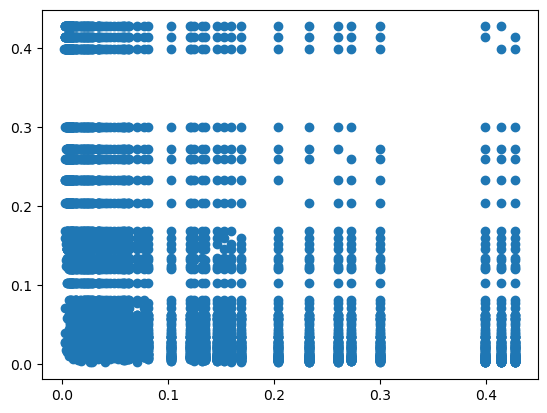

In [44]:
def scatter_plot(rules_):
    plt.figure(figsize=(16,6))
    fig, ax = plt.subplots(3,2, figsize=(16,10))
    ax[0, 0].scatter(rules_['support'], rules_['confidence']);
    ax[0, 0].set_title('confidence vs support');

    ax[0, 1].scatter(rules_['support'], rules_['lift']);
    ax[0, 1].set_title('confidence Histogram');

    ax[1, 0].scatter(rules_['confidence'], rules_['lift']);
    ax[1, 0].set_title('lift Histogram');

    ax[1, 1].scatter(rules_['support'], rules_['zhangs_metric']);
    ax[1, 1].set_title('support vs zhangs_metric');

    #ax[2, 0].hist(rules['conviction'], bins=5);
    #ax[2, 0].set_title('conviction Histogram');

    ax[2, 1].scatter(rules_['confidence'], rules_['zhangs_metric']);
    ax[2, 1].set_title(' confidence vs zhangs_metric Histogram');
plt.scatter(rules['antecedent support'], rules['consequent support'])

<Figure size 1600x600 with 0 Axes>

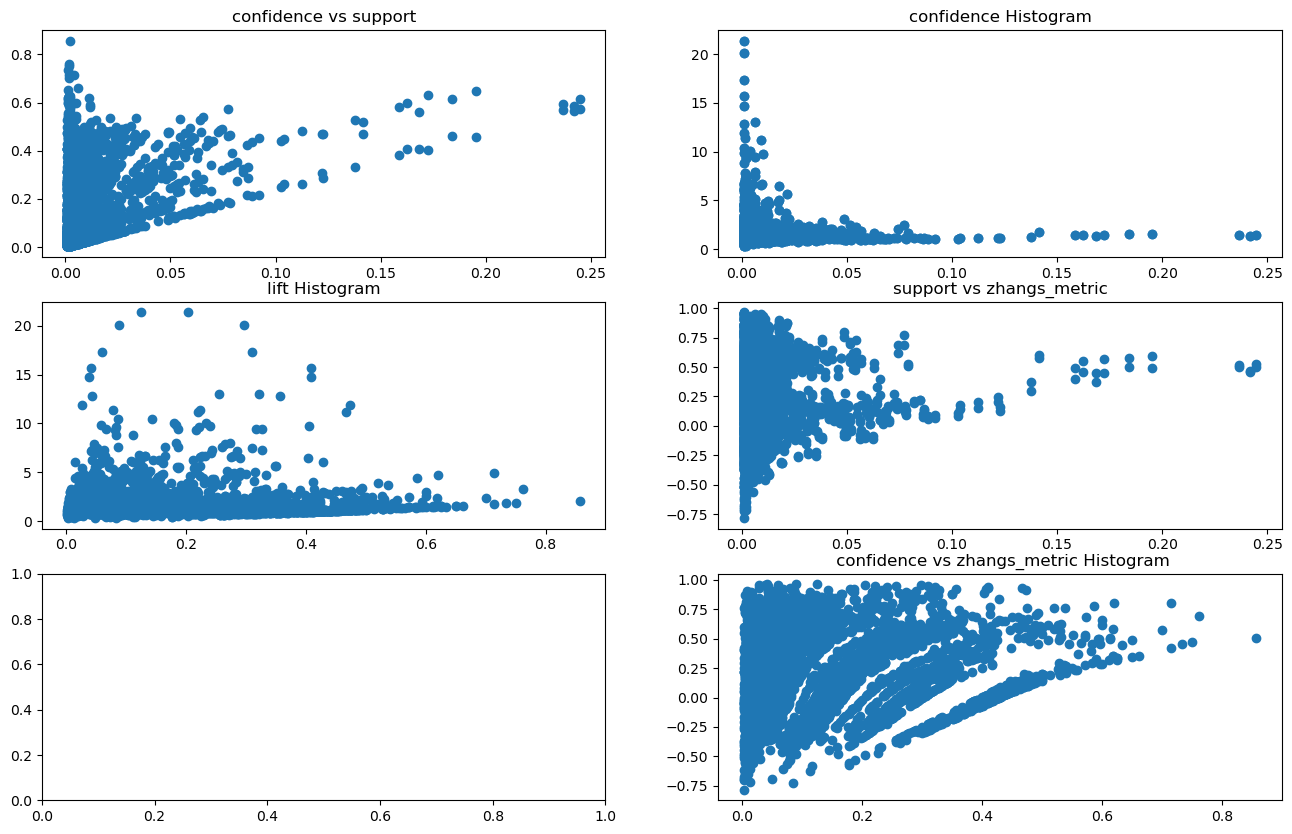

In [45]:
scatter_plot(rules)

In [ ]:
plt.scatter(rules['support'], rules['confidence'])

In [33]:
rule1 =  rules[(rules['lift']>1) & (rules['zhangs_metric']>0.5)]
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Beans),(Other Vegetables),0.399070,0.427805,0.244664,0.613086,1.433098,0.073940,1.478870,0.502905
1,(Other Vegetables),(Beans),0.427805,0.399070,0.244664,0.571906,1.433098,0.073940,1.403735,0.528161
11,(Other Vegetables),(Gourd & Cucumber),0.427805,0.300346,0.195183,0.456243,1.519059,0.066694,1.286704,0.597170
12,(Other Vegetables),(Brinjals),0.427805,0.272445,0.172529,0.403289,1.480255,0.055975,1.219274,0.567011
146,(Other Vegetables),(Oats),0.427805,0.009181,0.006081,0.014214,1.548224,0.002153,1.005106,0.618842
...,...,...,...,...,...,...,...,...,...,...
4831,"(Shaving Cream, Foam & Gels)",(Shaving Blade & Razors),0.008346,0.013712,0.001192,0.142857,10.418634,0.001078,1.150670,0.911627
4832,(Mango Juices),(Other Juices),0.012758,0.009539,0.001073,0.084112,8.818107,0.000951,1.081422,0.898054
4833,(Other Juices),(Mango Juices),0.009539,0.012758,0.001073,0.112500,8.818107,0.000951,1.112386,0.895135
4834,(Healthy Snacks),(Other Juices),0.005842,0.009539,0.001192,0.204082,21.395408,0.001137,1.244426,0.958863


<Figure size 1600x600 with 0 Axes>

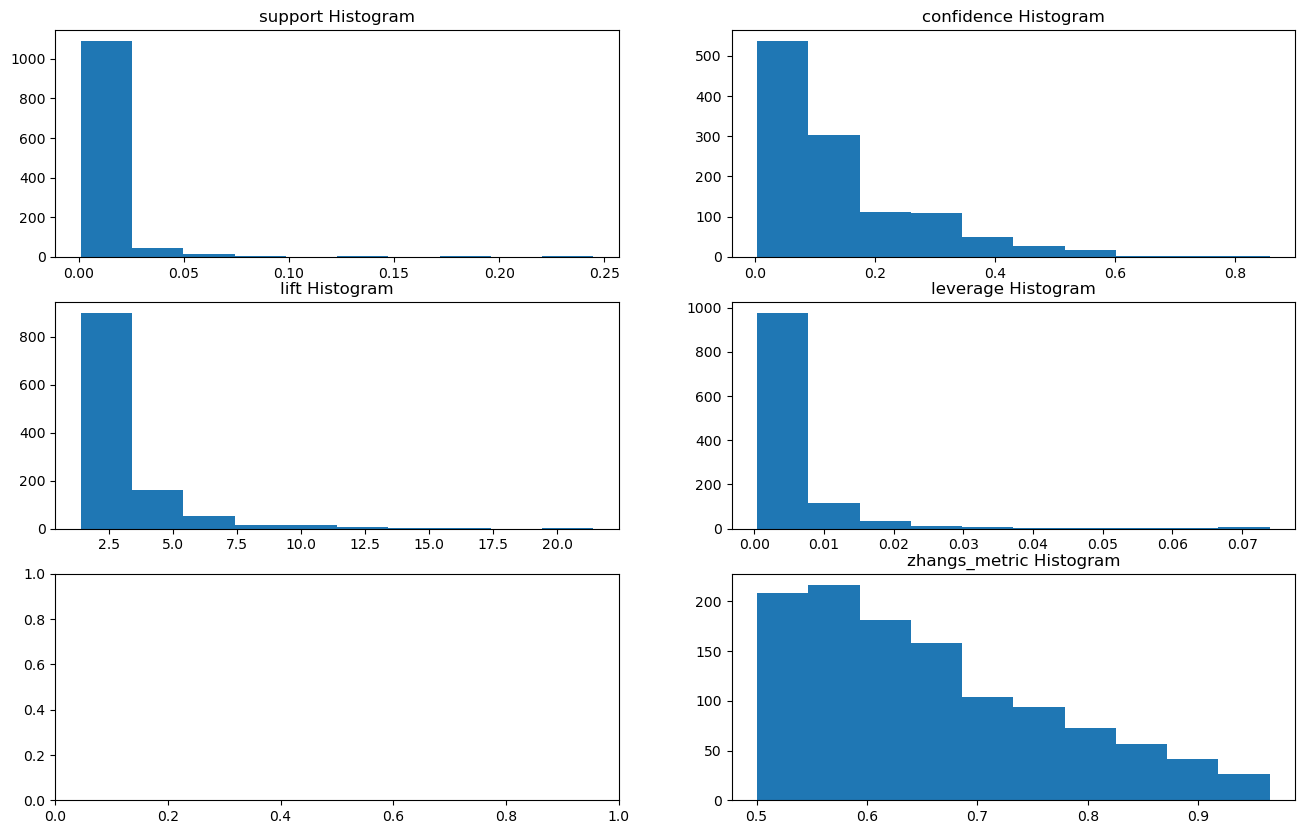

In [37]:
histogram_plot(rule1, 10)

In [39]:
rule2 = rules[(rules['lift']>1) & (rules['zhangs_metric']>0.4) & (rules['confidence']>0.1)]
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Beans),(Other Vegetables),0.399070,0.427805,0.244664,0.613086,1.433098,0.073940,1.478870,0.502905
1,(Other Vegetables),(Beans),0.427805,0.399070,0.244664,0.571906,1.433098,0.073940,1.403735,0.528161
2,(Other Vegetables),(Root Vegetables),0.427805,0.414093,0.241803,0.565217,1.364952,0.064652,1.347586,0.467277
3,(Root Vegetables),(Other Vegetables),0.414093,0.427805,0.241803,0.583933,1.364952,0.064652,1.375248,0.456341
10,(Gourd & Cucumber),(Other Vegetables),0.300346,0.427805,0.195183,0.649861,1.519059,0.066694,1.634194,0.488381
...,...,...,...,...,...,...,...,...,...,...
4829,(Instant Pastas),(Other Oils),0.009896,0.017527,0.001073,0.108434,6.186624,0.000900,1.101963,0.846741
4831,"(Shaving Cream, Foam & Gels)",(Shaving Blade & Razors),0.008346,0.013712,0.001192,0.142857,10.418634,0.001078,1.150670,0.911627
4833,(Other Juices),(Mango Juices),0.009539,0.012758,0.001073,0.112500,8.818107,0.000951,1.112386,0.895135
4834,(Healthy Snacks),(Other Juices),0.005842,0.009539,0.001192,0.204082,21.395408,0.001137,1.244426,0.958863


<Figure size 1600x600 with 0 Axes>

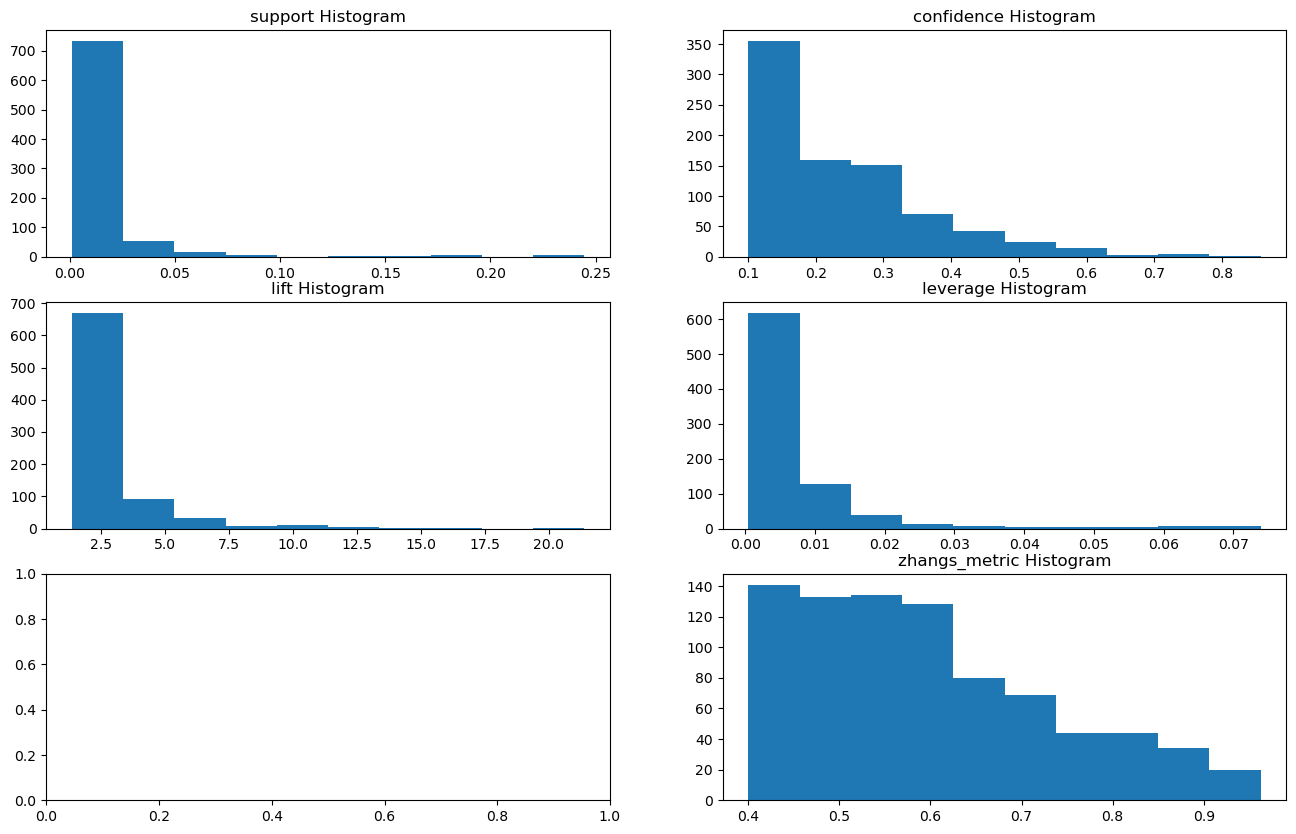

In [40]:
histogram_plot(rule2, 10)

In [46]:
rule3 = rules[(rules['lift']>1) & (rules['zhangs_metric']>0.4) & (rules['support']>0.1)]
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Beans),(Other Vegetables),0.399070,0.427805,0.244664,0.613086,1.433098,0.073940,1.478870,0.502905
1,(Other Vegetables),(Beans),0.427805,0.399070,0.244664,0.571906,1.433098,0.073940,1.403735,0.528161
2,(Other Vegetables),(Root Vegetables),0.427805,0.414093,0.241803,0.565217,1.364952,0.064652,1.347586,0.467277
3,(Root Vegetables),(Other Vegetables),0.414093,0.427805,0.241803,0.583933,1.364952,0.064652,1.375248,0.456341
10,(Gourd & Cucumber),(Other Vegetables),0.300346,0.427805,0.195183,0.649861,1.519059,0.066694,1.634194,0.488381
11,(Other Vegetables),(Gourd & Cucumber),0.427805,0.300346,0.195183,0.456243,1.519059,0.066694,1.286704,0.597170
12,(Other Vegetables),(Brinjals),0.427805,0.272445,0.172529,0.403289,1.480255,0.055975,1.219274,0.567011
13,(Brinjals),(Other Vegetables),0.272445,0.427805,0.172529,0.633260,1.480255,0.055975,1.560222,0.445933
242,(Beans),(Root Vegetables),0.399070,0.414093,0.236437,0.592471,1.430767,0.071185,1.437705,0.501014
243,(Root Vegetables),(Beans),0.414093,0.399070,0.236437,0.570976,1.430767,0.071185,1.400691,0.513860


Sale_code	product_code	product_name	product_category	product_price	sale_date	discount_company	bonus_card	store_name	store_lat	store_long

In [201]:
Testvar = rules[['support', 'confidence', 'lift', 'leverage', 'zhangs_metric']]

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


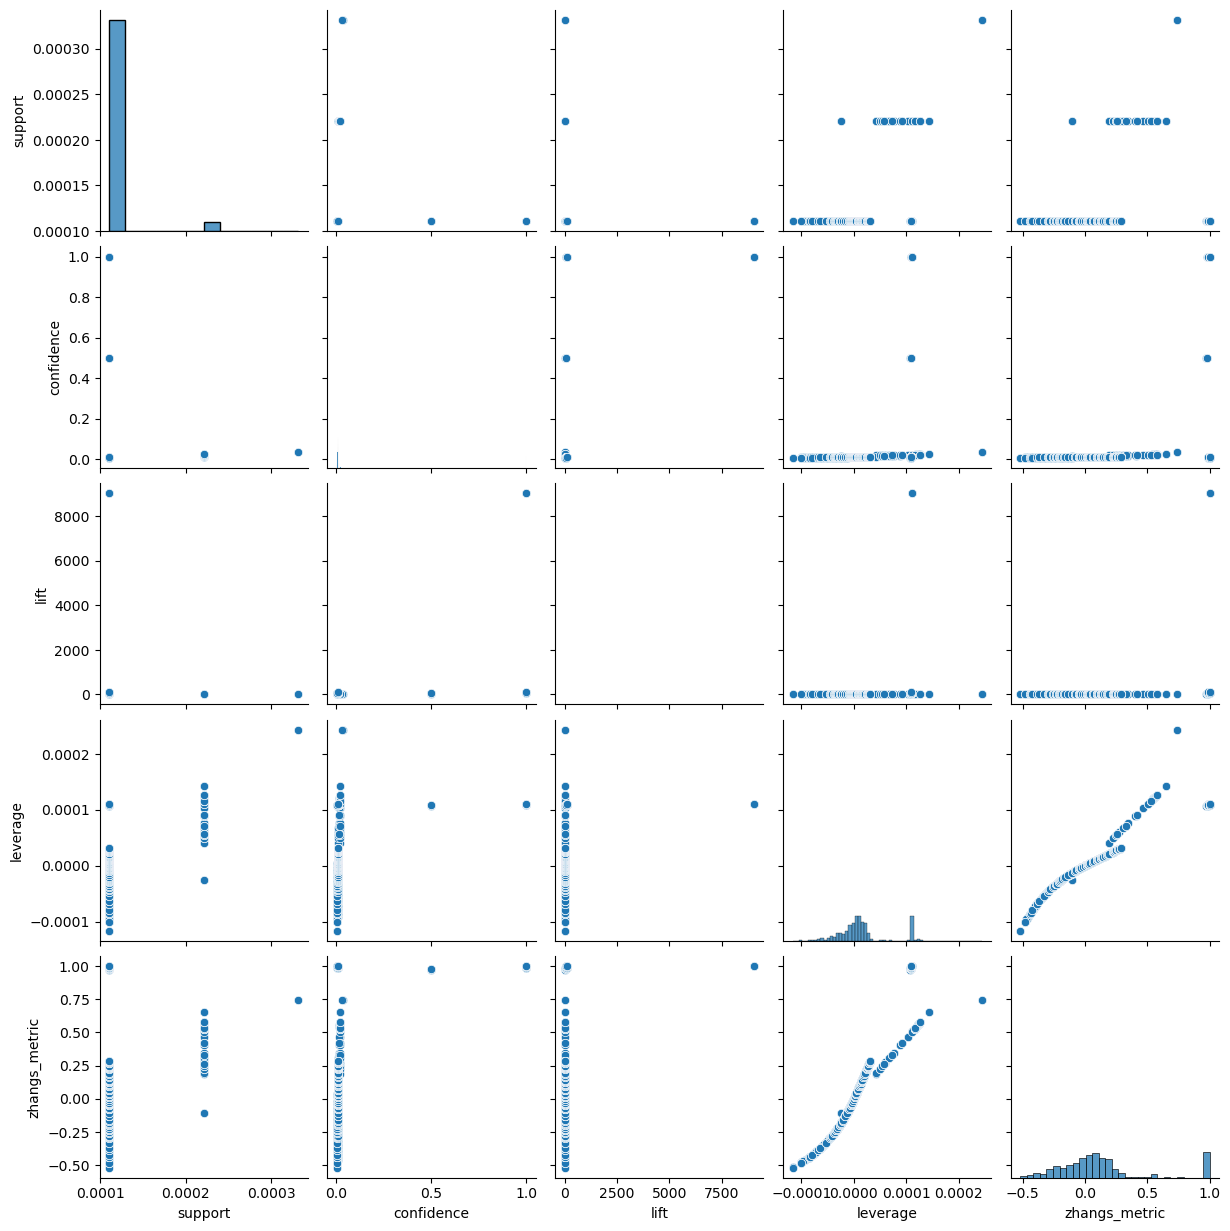

In [202]:
sns.pairplot(Testvar)

In [258]:
ind = []
for i in range(len(rules)):
    if len(rules['antecedents'].iloc[i]) == 1:
        ind.append(i)
       

In [259]:
ind

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [261]:
rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(8765),(8246),0.012054,0.017472,0.000111,0.009174,0.525084,-0.000100,0.991625,-0.477941
1,(8246),(8765),0.017472,0.012054,0.000111,0.006329,0.525084,-0.000100,0.994239,-0.479313
2,(7380),(8246),0.011611,0.017472,0.000111,0.009524,0.545087,-0.000092,0.991975,-0.457810
3,(8246),(7380),0.017472,0.011611,0.000111,0.006329,0.545087,-0.000092,0.994684,-0.459287
4,(2462),(8246),0.011279,0.017472,0.000111,0.009804,0.561119,-0.000086,0.992256,-0.441676
5,(8246),(2462),0.017472,0.011279,0.000111,0.006329,0.561119,-0.000086,0.995018,-0.443226
6,(6002),(8246),0.011279,0.017472,0.000111,0.009804,0.561119,-0.000086,0.992256,-0.441676
7,(8246),(6002),0.017472,0.011279,0.000111,0.006329,0.561119,-0.000086,0.995018,-0.443226
8,(7824),(8246),0.010948,0.017472,0.000111,0.010101,0.578123,-0.000081,0.992554,-0.424564
9,(8246),(7824),0.017472,0.010948,0.000111,0.006329,0.578123,-0.000081,0.995352,-0.426182


In [355]:
#rule 3 
rule3 = rules[(rules['zhangs_metric'] > 0.4)]
rule3.reset_index(inplace=True)
rule3.head(150)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
238,(5808),(2070),0.013159,0.010063,0.000221,0.016807,1.670145,0.000089,1.006859,0.406600
239,(2070),(5808),0.010063,0.013159,0.000221,0.021978,1.670145,0.000089,1.009017,0.405328
314,(9916),(8765),0.009842,0.012054,0.000221,0.022472,1.864344,0.000103,1.010658,0.468226
315,(8765),(9916),0.012054,0.009842,0.000221,0.018349,1.864344,0.000103,1.008666,0.469275
326,(3798),(8631),0.010948,0.011832,0.000221,0.020202,1.707354,0.000092,1.008542,0.418884
327,(8631),(3798),0.011832,0.010948,0.000221,0.018692,1.707354,0.000092,1.007891,0.419259
464,(8065),(3919),0.011390,0.008957,0.000221,0.019417,2.167805,0.000119,1.010667,0.544911
465,(3919),(8065),0.008957,0.011390,0.000221,0.024691,2.167805,0.000119,1.013638,0.543573
532,(6002),(8339),0.011279,0.008847,0.000221,0.019608,2.216422,0.000121,1.010976,0.555083
533,(8339),(6002),0.008847,0.011279,0.000221,0.025000,2.216422,0.000121,1.014072,0.553721


(array([72.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0.00011058, 0.00012164, 0.0001327 , 0.00014376, 0.00015482,
        0.00016587, 0.00017693, 0.00018799, 0.00019905, 0.00021011,
        0.00022117]),
 <BarContainer object of 10 artists>)

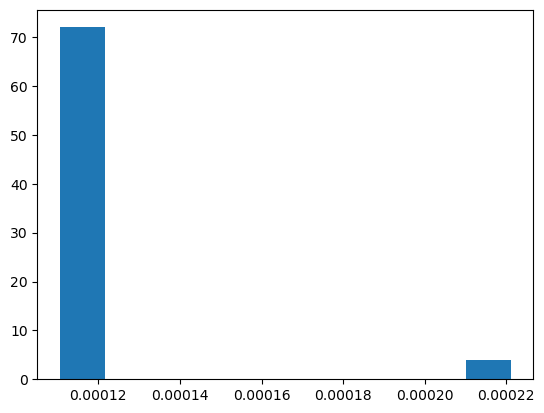

In [291]:
plt.hist(rule3['antecedent support'])

(array([ 6.,  0.,  0.,  0.,  2., 36., 22.,  3.,  6.,  1.]),
 array([0.00011058, 0.00184673, 0.00358288, 0.00531903, 0.00705518,
        0.00879133, 0.01052748, 0.01226363, 0.01399978, 0.01573593,
        0.01747208]),
 <BarContainer object of 10 artists>)

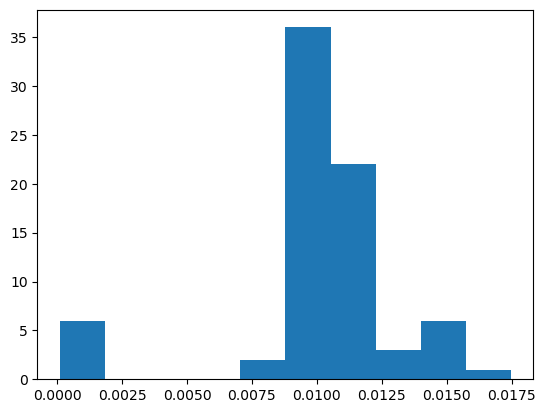

In [292]:
plt.hist(rule3['consequent support'])

In [316]:
data = []
data2 = []
for i in range(len(rule3)):
    l1 = list(rule3['antecedents'].iloc[i])
    l2 = list(rule3['consequents'].iloc[i])
    pname_list = []
    for j in range(len(l1)):
        pname = product_table.loc[int(l1[j])]['product_name']
        pname_list.append(pname)
    data.append(pname_list)
    pname_list = []
    for j in range(len(l2)):
        pname = product_table.loc[int(l2[j])]['product_name']
        pname_list.append(pname)
    data2.append(pname_list)
#
comb_data = {'Ante': data,
            'Conse': data2}
df_prod=pd.DataFrame(comb_data)
df_prod.to_csv('ToTranslate.csv')

In [323]:
df_prod_trans = pd.read_csv('C:/Users/ADMIN/Documents/pyNotebooks/DataAnalysis/EsasMehsullar/Translated.csv')
df_prod_trans.head()

In [359]:
rule3 = pd.concat([rule3, df_prod_trans], axis=1)

In [363]:
rule3 = rule3[rule3['confidence']>0.4]
rule3.head()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,Ante,Conse
38,1130,"(3541, 2462)",(8246),0.000111,0.017472,0.000111,1.0,57.234177,0.000109,inf,0.982637,"['DRAJE ELIT SPECIAL KG', 'PAREX FLOOR BOARD+M...",['KONFIRELLA 200GR ROLL WITH APRICOT']
39,1131,"(8246, 2462)",(3541),0.000111,0.010727,0.000111,1.0,93.226804,0.000109,inf,0.989383,"['KONFIRELLA 200GR RULET WITH ERIC', 'PAREX FL...",['DRAJE ELIT SPECIAL KG']
40,1132,"(3541, 8246)",(2462),0.000111,0.011279,0.000111,1.0,88.656863,0.000109,inf,0.988830,"['DRAJE ELIT SPECIAL KG', 'KONFIRELLA 200GR RU...",['PAREX FLOOR BOARD+MATPAS GIFT 6.']
44,1136,"(7380, 9188)",(3798),0.000111,0.010948,0.000111,1.0,91.343434,0.000109,inf,0.989162,"['VILO 80ML SHOE PAINT WATERPROOF', 'TANELLI 5...",['CARAMEL BAB. MU-MU/BURENKA KG']
45,1137,"(7380, 3798)",(9188),0.000111,0.015703,0.000111,1.0,63.683099,0.000109,inf,0.984406,"['VILO 80ML SHOE PAINT WATERPROOF', 'CARAMEL B...",['TANELLI 5KG PASTA BURMA']


In [364]:
rule3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 38 to 179
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               76 non-null     int64  
 1   antecedents         76 non-null     object 
 2   consequents         76 non-null     object 
 3   antecedent support  76 non-null     float64
 4   consequent support  76 non-null     float64
 5   support             76 non-null     float64
 6   confidence          76 non-null     float64
 7   lift                76 non-null     float64
 8   leverage            76 non-null     float64
 9   conviction          76 non-null     float64
 10  zhangs_metric       76 non-null     float64
 11  Ante                76 non-null     object 
 12  Conse               76 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 8.3+ KB
